In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\LOQ\Desktop\HR project\Data\HRVisual.csv")




In [18]:

max_salary = df['Salary_Cleaned'].max()
min_salary = df['Salary_Cleaned'].min()

print("Maximum Salary:", max_salary)
print("Minimum Salary:", min_salary)


Maximum Salary: 547204.0
Minimum Salary: 20387.0


In [19]:
import pandas as pd

bins = [20000, 100000, 180000, 260000, 370000, 550000]
labels = ['Very Low', 'Low', 'Average', 'High', 'Very High']
ranges = [
    '20K–100K',
    '100K–180K',
    '180K–260K',
    '260K–370K',
    '370K–550K'
]

df['SalaryCategory'] = pd.cut(df['Salary_Cleaned'], bins=bins, labels=labels, include_lowest=True)

df['SalaryRangeText'] = pd.cut(df['Salary_Cleaned'], bins=bins, labels=ranges, include_lowest=True)


df[['Salary_Cleaned', 'SalaryCategory', 'SalaryRangeText']].head(10)


,Salary_Cleaned,SalaryCategory,SalaryRangeText
0,63482.0,Very Low,20K–100K
1,33273.0,Very Low,20K–100K
2,108865.0,Low,100K–180K
3,23794.0,Very Low,20K–100K
4,78726.0,Very Low,20K–100K
5,78541.0,Very Low,20K–100K
6,129356.0,Low,100K–180K
7,61883.0,Very Low,20K–100K
8,140962.0,Low,100K–180K
9,50046.0,Very Low,20K–100K


In [20]:

df_hr_final = df.copy()


In [21]:

bins_age = [18, 30, 40, 50, df['Age'].max()]
labels_age = ['18-30', '31-40', '41-50', '>50']


df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, include_lowest=True)


In [22]:
df.to_csv(r"C:\Users\LOQ\Desktop\HR_project\Data\HR_updated.csv", index=False)


In [23]:
import os
import pandas as pd
from pathlib import Path

work_dir = r"C:\Users\LOQ\Desktop\HR project\Data"  
perf_path = Path(work_dir) / "performance_valid.csv"       
hr_path = Path(work_dir) / "HR3.csv"           


perf = pd.read_csv(perf_path, parse_dates=['ReviewDate'], dayfirst=False)
hr = pd.read_csv(hr_path, parse_dates=['HireDate', 'AttritionDate'], dayfirst=False)


perf_backup_path = Path(work_dir) / "performance_with_attrition_backup.csv"
perf.to_csv(perf_backup_path, index=False)
print("Backup saved:", perf_backup_path)


attrition_cols = [c for c in perf.columns if 'attrition' in c.lower() or 'attrition' in c.lower().replace('_',' ')]
print("Found attrition-related columns in performance:", attrition_cols)


perf_clean = perf.drop(columns=attrition_cols, errors='ignore')


perf_clean_path = Path(work_dir) / "performance_no_attrition.csv"
perf_clean.to_csv(perf_clean_path, index=False)
print("Performance (no attrition) saved:", perf_clean_path)


Backup saved: C:\Users\LOQ\Desktop\HR project\Data\performance_with_attrition_backup.csv
Found attrition-related columns in performance: ['Perf_AttritionDate', 'AttritionFlag', 'Attrition', 'Emp_AttritionDate']
Performance (no attrition) saved: C:\Users\LOQ\Desktop\HR project\Data\performance_no_attrition.csv


In [24]:
import pandas as pd
import numpy as np


hr_path = r"C:\Users\LOQ\Desktop\HR project\Data\HRnoatt.csv"
perf_path = r"C:\Users\LOQ\Desktop\HR project\Data\performancenoattrition.csv"

hr = pd.read_csv(hr_path, parse_dates=['HireDate','AttritionDate'], dayfirst=False)
perf = pd.read_csv(perf_path, parse_dates=['ReviewDate'], dayfirst=False)

print("HR rows,cols:", hr.shape)
print("Perf rows,cols:", perf.shape)
print(hr.columns.tolist()[:30])
print(perf.columns.tolist()[:30])


HR rows,cols: (1233, 55)
Perf rows,cols: (3822, 20)
['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State', 'Ethnicity', 'EducationField', 'JobRole', 'MaritalStatus', 'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition_x', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EducationLevel.txt', 'SalaryOutlier', 'LogSalary', 'Avg_Salary_NoOutliers', 'Salary_Cleaned', 'Attrition_str', 'AttritionDate', 'AttritionFlag']
['PerformanceID', 'EmployeeID', 'ReviewDate', 'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken', 'EnviromentSatisfactionLevel', 'JobSatisfactionLevel', 'RelationshipSatisfactionLevel', 'SatisfactionLevel', 'SelfRatingLevel', 'RatingLevel', 'Perf_HireDate', 'Emp_HireDate', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'Employee.Attrition']


In [25]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       1233 non-null   object        
 1   FirstName                        1233 non-null   object        
 2   LastName                         1233 non-null   object        
 3   Gender                           1233 non-null   object        
 4   Age                              1233 non-null   int64         
 5   BusinessTravel                   1233 non-null   object        
 6   Department                       1233 non-null   object        
 7   DistanceFromHome (KM)            1233 non-null   int64         
 8   State                            1233 non-null   object        
 9   Ethnicity                        1233 non-null   object        
 10  EducationField                   1233 non-null   object     

In [26]:

travel_map = {
    'No Travel': 0,
    'Some Travel': 1,
    'Frequent Traveller': 2
}
hr['BusinessTravel_num'] = hr['BusinessTravel'].map(travel_map)

overtime_map = {
    'No': 0,
    'Yes': 1
}
hr['OverTime_num'] = hr['OverTime'].map(overtime_map)


gender_map = {
    'Male': 0,
    'Female': 1,
    'Non-Binary' : 2,
    'Prefer Not To Say' : 3
}
hr['Gender_num'] = hr['Gender'].map(gender_map)


marital_map = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'Widowed': 3
}
hr['MaritalStatus_num'] = hr['MaritalStatus'].map(marital_map)


education_map = {
    'No Formal Qualifications': 1,
    'High School': 2,
    'Bachelors': 3,
    'Masters': 4,
    'Doctorate': 5
}
hr['EducationLevel_num'] = hr['EducationLevel.txt'].map(education_map)



In [27]:
performance_related = hr[[
    'ManagerRating', 'SelfRating', 'Salary', 'YearsAtCompany',
    'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
    'OverTime_num', 'BusinessTravel_num', 'Gender_num',
    'MaritalStatus_num', 'EducationLevel_num', 'DistanceFromHome (KM)'
]]


corr = performance_related.corr()


corr_with_perf = corr['ManagerRating'].sort_values(ascending=False)
print(corr_with_perf)


ManagerRating                      1.000000
SelfRating                         0.854011
YearsAtCompany                     0.050630
TrainingOpportunitiesTaken         0.046368
YearsWithCurrManager               0.021386
YearsSinceLastPromotion            0.018641
Salary                            -0.005815
TrainingOpportunitiesWithinYear   -0.006547
BusinessTravel_num                -0.009591
DistanceFromHome (KM)             -0.018560
MaritalStatus_num                 -0.037878
EducationLevel_num                -0.039575
Gender_num                        -0.063976
OverTime_num                      -0.070978
Name: ManagerRating, dtype: float64


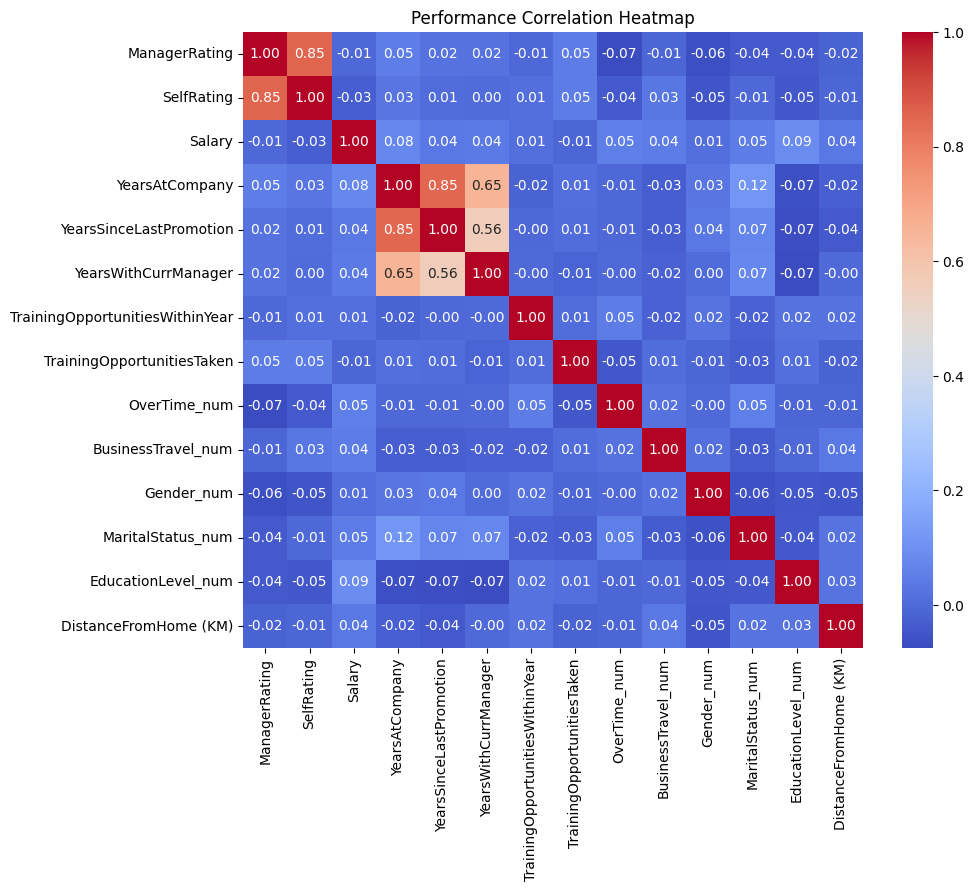

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Performance Correlation Heatmap')
plt.show()


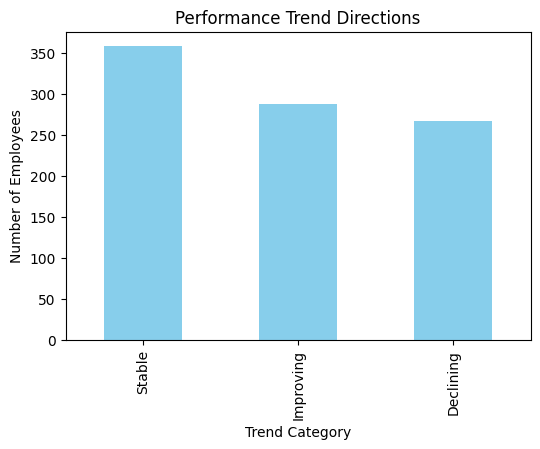

,EmployeeID,ManagerTrend,SelfTrend,Trend_Direction
0,C28E-0CC3,NaN,NaN,NaN
1,A5CD-8AB8,NaN,NaN,NaN
2,4268-9EAD,NaN,NaN,NaN
3,B324-A703,NaN,NaN,NaN
4,A12D-DAF8,NaN,NaN,NaN


In [29]:
import pandas as pd
import matplotlib.pyplot as plt


perf['ReviewDate'] = pd.to_datetime(perf['ReviewDate'], errors='coerce')


perf = perf.sort_values(['EmployeeID', 'ReviewDate'])

trend_summary = (
    perf.groupby('EmployeeID')
    .agg(
        First_ManagerRating=('ManagerRating', 'first'),
        Last_ManagerRating=('ManagerRating', 'last'),
        Reviews_Count=('ManagerRating', 'count'),
        Avg_ManagerRating=('ManagerRating', 'mean'),
        First_SelfRating=('SelfRating', 'first'),
        Last_SelfRating=('SelfRating', 'last'),
        Avg_SelfRating=('SelfRating', 'mean')
    )
    .reset_index()
)


trend_summary['ManagerTrend'] = (
    trend_summary['Last_ManagerRating'] - trend_summary['First_ManagerRating']
)
trend_summary['SelfTrend'] = (
    trend_summary['Last_SelfRating'] - trend_summary['First_SelfRating']
)

trend_summary['Trend_Direction'] = trend_summary['ManagerTrend'].apply(
    lambda x: 'Improving' if x > 0.2 else ('Declining' if x < -0.2 else 'Stable')
)


plt.figure(figsize=(6,4))
trend_summary['Trend_Direction'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Performance Trend Directions")
plt.xlabel("Trend Category")
plt.ylabel("Number of Employees")
plt.show()


hr = hr.merge(
    trend_summary[['EmployeeID', 'ManagerTrend', 'SelfTrend', 'Trend_Direction']],
    on='EmployeeID',
    how='left'
)


hr[['EmployeeID', 'ManagerTrend', 'SelfTrend', 'Trend_Direction']].head()


In [30]:
hr['DueForPromotion'] = hr.apply(
    lambda row: 1 if (
        row['YearsSinceLastPromotion'] > 3 and 
        row['ManagerTrend'] > 0 and 
        row['ManagerRating'] > 4
    ) else 0,
    axis=1
)


In [27]:
hr['DueForPromotion'].value_counts()
hr.groupby('Department')['DueForPromotion'].mean().sort_values(ascending=False)


Department
Human Resources    0.176471
Technology         0.145103
Sales              0.126761
Name: DueForPromotion, dtype: float64

In [31]:

low_perf = hr['ManagerRating'] <= 2  
declining_trend = hr['ManagerTrend'] < 0  


hr['AtRiskOfFiring'] = (low_perf & declining_trend)


In [32]:

risk_rate = hr['AtRiskOfFiring'].mean()
print(f"Overall firing risk rate: {risk_rate:.2%}")

print(hr.groupby('Department')['AtRiskOfFiring'].mean().sort_values(ascending=False))

print(hr.groupby('JobRole')['AtRiskOfFiring'].mean().sort_values(ascending=False))


Overall firing risk rate: 9.08%
Department
Sales              0.098592
Technology         0.089480
Human Resources    0.058824
Name: AtRiskOfFiring, dtype: float64
JobRole
Analytics Manager            0.142857
Hr Executive                 0.120000
Sales Representative         0.120000
Senior Software Engineer     0.105691
Sales Executive              0.103704
Machine Learning Engineer    0.102941
Software Engineer            0.085020
Data Scientist               0.070352
Engineering Manager          0.068493
Manager                      0.028571
Hr Business Partner          0.000000
Recruiter                    0.000000
Hr Manager                   0.000000
Name: AtRiskOfFiring, dtype: float64


In [33]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       1233 non-null   object        
 1   FirstName                        1233 non-null   object        
 2   LastName                         1233 non-null   object        
 3   Gender                           1233 non-null   object        
 4   Age                              1233 non-null   int64         
 5   BusinessTravel                   1233 non-null   object        
 6   Department                       1233 non-null   object        
 7   DistanceFromHome (KM)            1233 non-null   int64         
 8   State                            1233 non-null   object        
 9   Ethnicity                        1233 non-null   object        
 10  EducationField                   1233 non-null   object     

In [34]:
hr.to_csv(r"C:\Users\LOQ\Desktop\HR project\Data\HR_Analysis.csv", index=False)

In [35]:

hr = pd.read_csv(r"C:\Users\LOQ\Desktop\HR project\Data\HR3.csv")



In [36]:
hr['Attrition_x'].value_counts(normalize=True)


Attrition_x
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [37]:
hr['AttritionFlag'] = hr['Attrition_x'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)


In [38]:
hr['AttritionFlag'].value_counts()


AttritionFlag
0    1233
1     237
Name: count, dtype: int64

In [39]:
hr.groupby('Department')['AttritionFlag'].mean().sort_values(ascending=False)


Department
Sales              0.205817
Human Resources    0.190476
Technology         0.138542
Name: AttritionFlag, dtype: float64

In [40]:
corr = hr[['AttritionFlag', 'Age', 'YearsSinceLastPromotion', 'Salary_Cleaned', 'ManagerRating']].corr()
corr['AttritionFlag'].sort_values(ascending=False)


AttritionFlag              1.000000
ManagerRating             -0.008604
Age                       -0.134413
Salary_Cleaned            -0.135999
YearsSinceLastPromotion   -0.297491
Name: AttritionFlag, dtype: float64

In [41]:
perf = pd.read_csv(r"C:\Users\LOQ\Desktop\HR project\Data\perf.csv")

In [42]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   PerformanceID                              4386 non-null   object
 1   EmployeeID                                 4386 non-null   object
 2   ReviewDate                                 4386 non-null   object
 3   TrainingOpportunitiesWithinYear            4386 non-null   int64 
 4   TrainingOpportunitiesTaken                 4386 non-null   int64 
 5   EnviromentSatisfactionLevel                4386 non-null   object
 6   JobSatisfactionLevel                       4386 non-null   object
 7   RelationshipSatisfactionLevel              4386 non-null   object
 8   SatisfactionLevel                          4386 non-null   object
 9   SelfRatingLevel                            4386 non-null   object
 10  RatingLevel                         

In [43]:
perf['AttritionFlag'] = perf['Attrition'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)


In [44]:
corr_attrition = perf.corr(numeric_only=True)['AttritionFlag'].sort_values(ascending=False)
print(corr_attrition)


AttritionFlag                                1.000000
WorkLifeBalance                              0.016695
RelationshipSatisfaction                     0.008458
PerformanceRating.JobSatisfaction            0.007689
SelfRating                                   0.007163
ManagerRating                                0.001975
TrainingOpportunitiesWithinYear              0.001256
TrainingOpportunitiesTaken                  -0.010125
PerformanceRating.EnvironmentSatisfaction   -0.010463
Name: AttritionFlag, dtype: float64


In [45]:
corr_attrition = hr.corr(numeric_only=True)['AttritionFlag'].sort_values(ascending=False)
print(corr_attrition)


AttritionFlag                      1.000000
WorkLifeBalance                    0.038085
JobSatisfaction                    0.031515
TrainingOpportunitiesWithinYear    0.001430
RelationshipSatisfaction          -0.007532
ManagerRating                     -0.008604
DistanceFromHome (KM)             -0.009843
SelfRating                        -0.012352
TrainingOpportunitiesTaken        -0.021968
EnvironmentSatisfaction           -0.030532
Age                               -0.134413
Salary_Cleaned                    -0.135999
StockOptionLevel                  -0.137145
YearsWithCurrManager              -0.219889
YearsInMostRecentRole             -0.224829
YearsAtCompany                    -0.284964
YearsSinceLastPromotion           -0.297491
ManagerTrend                            NaN
DueForPromotion                         NaN
Name: AttritionFlag, dtype: float64


In [46]:
dept_attrition = hr.groupby('Department')['AttritionFlag'].mean().sort_values(ascending=False)
print(dept_attrition)

role_attrition = hr.groupby('JobRole')['AttritionFlag'].mean().sort_values(ascending=False)
print(role_attrition)


Department
Sales              0.205817
Human Resources    0.190476
Technology         0.138542
Name: AttritionFlag, dtype: float64
JobRole
Sales Representative         0.397590
Recruiter                    0.375000
Data Scientist               0.237548
Sales Executive              0.174312
Software Engineer            0.159864
Hr Executive                 0.107143
Machine Learning Engineer    0.068493
Senior Software Engineer     0.068182
Analytics Manager            0.057692
Manager                      0.054054
Engineering Manager          0.026667
Hr Business Partner          0.000000
Hr Manager                   0.000000
Name: AttritionFlag, dtype: float64


In [47]:
attrition_summary = hr.groupby('EducationLevel.txt')['AttritionFlag'].mean().sort_values(ascending=False)
print(attrition_summary)

attrition_by_age = hr.groupby('Age_Group')['AttritionFlag'].mean().sort_values(ascending=False)
print(attrition_by_age)

attrition_by_salary = hr.groupby('SalaryCategory')['AttritionFlag'].mean().sort_values(ascending=False)
print(attrition_by_salary)


EducationLevel.txt
No Formal Qualifications    0.182353
Bachelors                   0.173077
High School                 0.156028
Masters                     0.145729
Doctorate                   0.104167
Name: AttritionFlag, dtype: float64
Age_Group
18-30    0.204204
41-50    0.072917
31-40    0.068345
>50      0.000000
Name: AttritionFlag, dtype: float64
SalaryCategory
Very Low     0.196203
Low          0.115880
High         0.102804
Average      0.082707
Very High    0.040816
Name: AttritionFlag, dtype: float64


In [48]:
hr_reviewed = hr.dropna(subset=['ManagerRating', 'SelfRating', 'JobSatisfactionLevel'])



In [49]:
missing_reviews = hr[hr['ManagerRating'].isnull()]


In [50]:
missing_reviews['Department'].value_counts(normalize=True)
missing_reviews['AttritionFlag'].mean()
missing_reviews['YearsAtCompany'].mean()


np.float64(0.8398950131233596)

In [51]:
value = np.float64(1.6050269299820468)
print(float(value))  # → 1.6050269299820468
print(round(float(value), 2))  # → 1.61


1.6050269299820468
1.61


In [52]:
missing_reviews. count()

EmployeeID                         381
FirstName                          381
LastName                           381
Gender                             381
Age                                381
BusinessTravel                     381
Department                         381
DistanceFromHome (KM)              381
State                              381
Ethnicity                          381
EducationField                     381
JobRole                            381
MaritalStatus                      381
StockOptionLevel                   381
OverTime                           381
HireDate                           381
Attrition_x                        381
YearsAtCompany                     381
YearsInMostRecentRole              381
YearsSinceLastPromotion            381
YearsWithCurrManager               381
EducationLevel.txt                 381
Salary_Cleaned                     381
AttritionDate                       61
PerformanceID                        0
ReviewDate               

In [53]:
hr_reviewed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089 entries, 0 to 1088
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EmployeeID                       1089 non-null   object 
 1   FirstName                        1089 non-null   object 
 2   LastName                         1089 non-null   object 
 3   Gender                           1089 non-null   object 
 4   Age                              1089 non-null   int64  
 5   BusinessTravel                   1089 non-null   object 
 6   Department                       1089 non-null   object 
 7   DistanceFromHome (KM)            1089 non-null   int64  
 8   State                            1089 non-null   object 
 9   Ethnicity                        1089 non-null   object 
 10  EducationField                   1089 non-null   object 
 11  JobRole                          1089 non-null   object 
 12  MaritalStatus            

In [54]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EmployeeID                       1470 non-null   object 
 1   FirstName                        1470 non-null   object 
 2   LastName                         1470 non-null   object 
 3   Gender                           1470 non-null   object 
 4   Age                              1470 non-null   int64  
 5   BusinessTravel                   1470 non-null   object 
 6   Department                       1470 non-null   object 
 7   DistanceFromHome (KM)            1470 non-null   int64  
 8   State                            1470 non-null   object 
 9   Ethnicity                        1470 non-null   object 
 10  EducationField                   1470 non-null   object 
 11  JobRole                          1470 non-null   object 
 12  MaritalStatus       

In [55]:
missing_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 1089 to 1469
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EmployeeID                       381 non-null    object 
 1   FirstName                        381 non-null    object 
 2   LastName                         381 non-null    object 
 3   Gender                           381 non-null    object 
 4   Age                              381 non-null    int64  
 5   BusinessTravel                   381 non-null    object 
 6   Department                       381 non-null    object 
 7   DistanceFromHome (KM)            381 non-null    int64  
 8   State                            381 non-null    object 
 9   Ethnicity                        381 non-null    object 
 10  EducationField                   381 non-null    object 
 11  JobRole                          381 non-null    object 
 12  MaritalStatus          

In [56]:
print(missing_reviews['Department'].value_counts(normalize=True))
print("Attrition rate:", missing_reviews['AttritionFlag'].mean())
print("Average years at company:", missing_reviews['YearsAtCompany'].mean())


Department
Technology         0.632546
Sales              0.322835
Human Resources    0.044619
Name: proportion, dtype: float64
Attrition rate: 0.16010498687664043
Average years at company: 0.8398950131233596


In [57]:
corr_cols = [
    'AttritionFlag', 
    'ManagerRating',
    'WorkLifeBalance',
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'RelationshipSatisfaction',
    'TrainingOpportunitiesWithinYear',
    'TrainingOpportunitiesTaken'
]

corr_matrix = hr_reviewed[corr_cols].corr()
corr_with_attrition = corr_matrix['AttritionFlag'].sort_values(ascending=False)
corr_with_attrition


AttritionFlag                      1.000000
WorkLifeBalance                    0.038085
JobSatisfaction                    0.031515
TrainingOpportunitiesWithinYear    0.001430
RelationshipSatisfaction          -0.007532
ManagerRating                     -0.008604
TrainingOpportunitiesTaken        -0.021968
EnvironmentSatisfaction           -0.030532
Name: AttritionFlag, dtype: float64

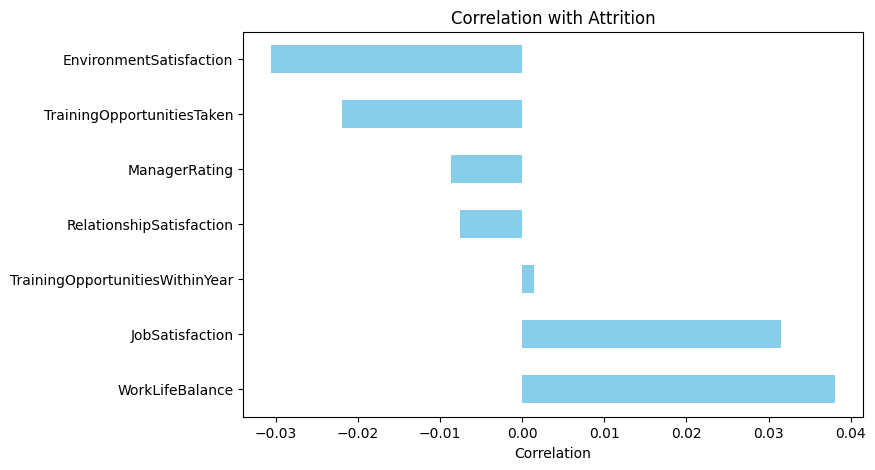

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
corr_with_attrition[1:].plot(kind='barh', color='skyblue')
plt.title('Correlation with Attrition')
plt.xlabel('Correlation')
plt.show()


In [59]:
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include=['float64','int64']).columns

imputer = SimpleImputer(strategy='constant', fill_value=3)
X[num_cols] = imputer.fit_transform(X[num_cols])


NameError: name 'X' is not defined

In [60]:
features = [
    'Age', 'Salary_Cleaned',
    'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager', 'WorkLifeBalance', 'JobSatisfaction',
    'EnvironmentSatisfaction', 'RelationshipSatisfaction',
    'ManagerRating', 'TrainingOpportunitiesTaken', 'TrainingOpportunitiesWithinYear'
]


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [62]:

hr_df = hr.copy()  


y = hr_df['AttritionFlag'].map({'Yes':1, 'No':0})  # numeric 0/1


num_cols = [
    'Age', 'Salary_Cleaned', 'YearsAtCompany', 
    'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'DistanceFromHome (KM)', 'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken'
]

cat_cols = [
    'Department', 'JobRole', 'Gender', 'MaritalStatus', 'EducationLevel.txt', 'OverTime', 'BusinessTravel'
]

X = hr_df[num_cols + cat_cols]


In [63]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=3)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


In [64]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
import pandas as pd
import numpy as np

y = hr['AttritionFlag'].map({'Yes': 1, 'No': 0})

y = y.fillna(0)

y = y.astype(np.int64)


print(y.dtype)  # should show: int64
print(y.isna().sum())  # should show 0


int64
0


In [67]:
from sklearn.impute import SimpleImputer


num_cols = X.select_dtypes(include=['float64', 'int64']).columns


imputer = SimpleImputer(strategy='constant', fill_value=3)

X.loc[:, num_cols] = imputer.fit_transform(X[num_cols])


print(X.isna().sum().sum()) 


0


In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

num_cols = ['Age', 'Salary_Cleaned', 'YearsAtCompany', 'YearsInMostRecentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager', 
            'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken']

cat_cols = ['Department', 'JobRole', 'Gender']

X_num = hr[num_cols]
X_cat = hr[cat_cols]

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = pd.DataFrame(
    encoder.fit_transform(X_cat),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_cat.index
)

X = pd.concat([X_num, X_cat_encoded], axis=1)

y = hr['AttritionFlag'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [69]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(max_iter=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [70]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model (can handle NaN values directly)
model = HistGradientBoostingClassifier(max_iter=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       378
           1       0.57      0.43      0.49        63

    accuracy                           0.87       441
   macro avg       0.74      0.69      0.71       441
weighted avg       0.86      0.87      0.87       441

Confusion Matrix:
 [[358  20]
 [ 36  27]]


In [71]:
hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EmployeeID                       1470 non-null   object 
 1   FirstName                        1470 non-null   object 
 2   LastName                         1470 non-null   object 
 3   Gender                           1470 non-null   object 
 4   Age                              1470 non-null   int64  
 5   BusinessTravel                   1470 non-null   object 
 6   Department                       1470 non-null   object 
 7   DistanceFromHome (KM)            1470 non-null   int64  
 8   State                            1470 non-null   object 
 9   Ethnicity                        1470 non-null   object 
 10  EducationField                   1470 non-null   object 
 11  JobRole                          1470 non-null   object 
 12  MaritalStatus       

In [72]:
# Predict probabilities
y_prob = model.predict_proba(X)[:, 1]  # probability of class 1 (leaving)

# Predict class labels
y_pred = model.predict(X)

# Add to your HR dataframe
hr['Attrition_Probability'] = y_prob
hr['Attrition_Prediction'] = y_pred


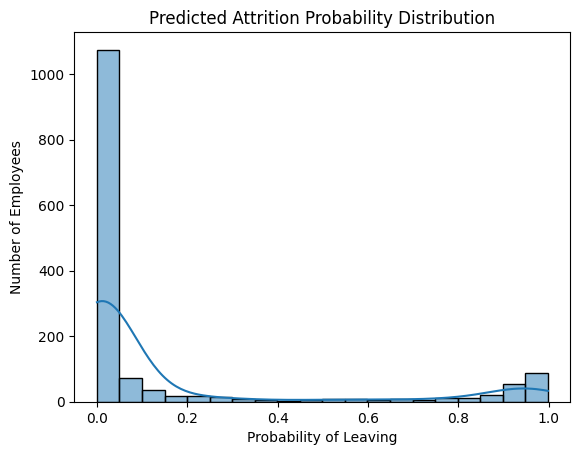

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(hr['Attrition_Probability'], bins=20, kde=True)
plt.title('Predicted Attrition Probability Distribution')
plt.xlabel('Probability of Leaving')
plt.ylabel('Number of Employees')
plt.show()


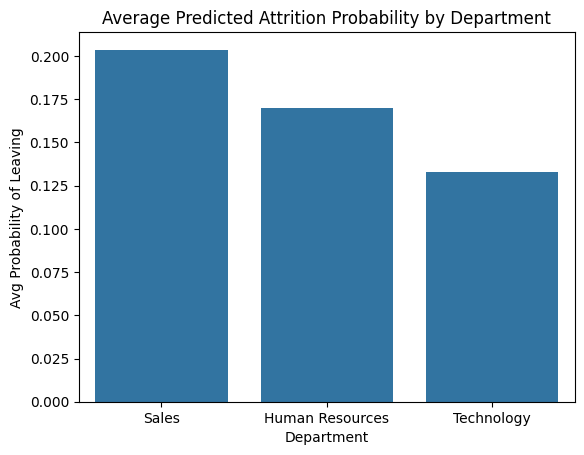

In [74]:
dept_risk = hr.groupby('Department')['Attrition_Probability'].mean().sort_values(ascending=False)

sns.barplot(x=dept_risk.index, y=dept_risk.values)
plt.title('Average Predicted Attrition Probability by Department')
plt.ylabel('Avg Probability of Leaving')
plt.show()


In [75]:
high_risk = hr[hr['Attrition_Probability'] > 0.7]  # example threshold
high_risk[['EmployeeID', 'Department', 'Attrition_Probability']]


,EmployeeID,Department,Attrition_Probability
0,152E-8DB1,Technology,0.986168
1,0A05-3943,Technology,0.969590
2,5060-A677,Technology,0.948727
3,7839-CA12,Sales,0.978507
4,02DA-7A72,Sales,0.960084
...,...,...,...
1443,1799-5B3F,Sales,0.898242
1446,CDFB-6A08,Technology,0.979255
1450,EAB1-2EB2,Technology,0.863515
1453,291F-B604,Technology,0.941957


In [76]:
high_risk = hr[hr['Attrition_Probability'] > 0.8]
print(high_risk[['EmployeeID', 'Department', 'Attrition_Probability']])


     EmployeeID  Department  Attrition_Probability
0     152E-8DB1  Technology               0.986168
1     0A05-3943  Technology               0.969590
2     5060-A677  Technology               0.948727
3     7839-CA12       Sales               0.978507
4     02DA-7A72       Sales               0.960084
...         ...         ...                    ...
1443  1799-5B3F       Sales               0.898242
1446  CDFB-6A08  Technology               0.979255
1450  EAB1-2EB2  Technology               0.863515
1453  291F-B604  Technology               0.941957
1462  5160-53BD  Technology               0.975124

[175 rows x 3 columns]


In [77]:
dept_risk = hr.groupby('Department')['Attrition_Probability'].mean().sort_values(ascending=False)
print(dept_risk)


Department
Sales              0.203643
Human Resources    0.169833
Technology         0.132848
Name: Attrition_Probability, dtype: float64


In [78]:

hra = hr[hr['Attrition_x'] == 'No'].copy()

print(hra.shape)


(1233, 52)


In [79]:

print(f"Number of current employees: {hra.shape[0]}")
print(hra['Department'].value_counts())
print(hra['Attrition_Probability'].describe())


Number of current employees: 1233
Department
Technology         827
Sales              355
Human Resources     51
Name: count, dtype: int64
count    1233.000000
mean        0.036272
std         0.109027
min         0.000022
25%         0.000713
50%         0.003521
75%         0.020296
max         0.941671
Name: Attrition_Probability, dtype: float64


In [80]:
top_risk = hra.sort_values(by='Attrition_Probability', ascending=False).head(10)
print(top_risk[['EmployeeID','Department','Attrition_Probability']])


     EmployeeID       Department  Attrition_Probability
1146  372C-E204       Technology               0.941671
1116  B77D-2FBD            Sales               0.941340
809   BC43-E62B       Technology               0.909960
1196  2EC6-E2E0       Technology               0.904260
1145  5E73-CE19       Technology               0.902647
192   BC5E-3B7B            Sales               0.852835
1055  55A7-8D82  Human Resources               0.845800
351   617A-5092       Technology               0.800648
836   D383-714B       Technology               0.788757
426   3D47-6A75            Sales               0.783601


In [170]:
dept_risk = hra.groupby('Department')['Attrition_Probability'].mean().sort_values(ascending=False)
print(dept_risk)


Department
Sales              0.047574
Human Resources    0.043370
Technology         0.030983
Name: Attrition_Probability, dtype: float64


In [81]:
high_risk = hra[hra['Attrition_Probability'] > 0.8]
print(high_risk[['EmployeeID', 'Department', 'Attrition_Probability']])


     EmployeeID       Department  Attrition_Probability
192   BC5E-3B7B            Sales               0.852835
351   617A-5092       Technology               0.800648
809   BC43-E62B       Technology               0.909960
1055  55A7-8D82  Human Resources               0.845800
1116  B77D-2FBD            Sales               0.941340
1145  5E73-CE19       Technology               0.902647
1146  372C-E204       Technology               0.941671
1196  2EC6-E2E0       Technology               0.904260


In [173]:
hr.to_csv(r"C:\Users\LOQ\Desktop\HR project\HRVisual.csv", index=False)
hra.to_csv(r"C:\Users\LOQ\Desktop\HR project\HRA.csv", index=False)


In [82]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EmployeeID                       1470 non-null   object 
 1   FirstName                        1470 non-null   object 
 2   LastName                         1470 non-null   object 
 3   Gender                           1470 non-null   object 
 4   Age                              1470 non-null   int64  
 5   BusinessTravel                   1470 non-null   object 
 6   Department                       1470 non-null   object 
 7   DistanceFromHome (KM)            1470 non-null   int64  
 8   State                            1470 non-null   object 
 9   Ethnicity                        1470 non-null   object 
 10  EducationField                   1470 non-null   object 
 11  JobRole                          1470 non-null   object 
 12  MaritalStatus       

In [83]:
hr.to_csv("hr.csv", index=False)


In [84]:
hr['HireDate'] = pd.to_datetime(hr['HireDate'], errors='coerce')
hr['AttritionDate'] = pd.to_datetime(hr['AttritionDate'], errors='coerce')


In [85]:
hr['HireYear'] = hr['HireDate'].dt.year
hr['ExitYear'] = hr['AttritionDate'].dt.year


In [86]:
attrition_by_year = (
    hr[hr['Attrition_x'] == 'Yes']
    .groupby('ExitYear')
    .size()
    .reset_index(name='Leavers')
)


In [88]:
hr['HireYear'] = hr['HireDate'].dt.year.astype('Int64')
hr['ExitYear'] = hr['AttritionDate'].dt.year.astype('Int64')


In [89]:
print(hr[['HireYear','ExitYear']].dtypes)


HireYear    Int64
ExitYear    Int64
dtype: object


In [90]:
min_year = int(hr['HireYear'].min())
max_year = int(hr['ExitYear'].max())   # automatically skips NaN


In [91]:
years = range(min_year, max_year + 1)


In [92]:
print(min_year, max_year)


2012 2022


In [93]:
hires = hr.groupby('HireYear')['EmployeeID'].count()
hires.name = 'Hires'


In [94]:
exits = hr.groupby('ExitYear')['EmployeeID'].count()
exits.name = 'Exits'


In [95]:
years = range(min_year, max_year + 1)

attrition_df = pd.DataFrame(index=years)
attrition_df.index.name = "Year"

attrition_df = attrition_df.join(hires, how='left')
attrition_df = attrition_df.join(exits, how='left')

attrition_df = attrition_df.fillna(0)


In [96]:
attrition_df['ActiveEmployees'] = (
    attrition_df['Hires'].cumsum() - attrition_df['Exits'].cumsum()
)


In [97]:
attrition_df['AttritionRate'] = (
    attrition_df['Exits'] / attrition_df['ActiveEmployees'].shift(1)
)

attrition_df['AttritionRate'] = attrition_df['AttritionRate'].fillna(0)


In [98]:
attrition_df


,Hires,Exits,ActiveEmployees,AttritionRate
Year,,,,
2012,151,0.0,151.0,0.000000
2013,136,2.0,285.0,0.013245
2014,136,10.0,411.0,0.035088
2015,127,11.0,527.0,0.026764
2016,114,12.0,629.0,0.022770
2017,106,14.0,721.0,0.022258
2018,136,21.0,836.0,0.029126
2019,145,21.0,960.0,0.025120
2020,127,32.0,1055.0,0.033333


In [111]:
import pandas as pd
from prophet import Prophet


data = {
    'Year': [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
    'Hires': [151,136,136,127,114,106,136,145,127,137,155],
    'Exits': [0,2,10,11,12,14,21,21,32,60,54],
    'ActiveEmployees': [151,285,411,527,629,721,836,960,1055,1132,1233],
    'AttritionRate': [0,0.013245,0.035088,0.026764,0.02277,0.022258,0.029126,0.02512,0.033333,0.056872,0.047703]
}

df = pd.DataFrame(data)


df_hires = df[['Year', 'Hires']].rename(columns={'Year':'ds', 'Hires':'y'})
df_hires['ds'] = pd.to_datetime(df_hires['ds'], format='%Y')  # convert to datetime


m_hires = Prophet(yearly_seasonality=True)
m_hires.fit(df_hires)


future_hires = m_hires.make_future_dataframe(periods=10, freq='Y')


forecast_hires = m_hires.predict(future_hires)


forecast_hires[['ds','yhat','yhat_lower','yhat_upper']].tail(10)


18:56:18 - cmdstanpy - INFO - Chain [1] start processing
18:56:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
11,2022-12-31,127.782896,110.291698,145.179841
12,2023-12-31,122.449237,105.299391,140.154858
13,2024-12-31,136.510774,119.126530,153.968142
14,2025-12-31,133.829483,116.459649,151.169403
15,2026-12-31,129.817894,111.932887,146.052681
16,2027-12-31,124.484236,107.462276,141.617341
17,2028-12-31,138.545773,122.042065,155.782563
18,2029-12-31,135.864482,119.595891,152.663306
19,2030-12-31,131.852893,115.206385,149.860961
20,2031-12-31,126.519235,109.015269,144.123570


In [113]:
import pandas as pd
from prophet import Prophet

# Step 1: Load your data
data = {
    'Year': [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
    'Hires': [151,136,136,127,114,106,136,145,127,137,155],
    'Exits': [0,2,10,11,12,14,21,21,32,60,54],
    'ActiveEmployees': [151,285,411,527,629,721,836,960,1055,1132,1233],
    'AttritionRate': [0,0.013245,0.035088,0.026764,0.02277,0.022258,0.029126,0.02512,0.033333,0.056872,0.047703]
}

df = pd.DataFrame(data)

# Function to forecast a metric
def forecast_metric(df, column_name, periods=10):
    df_prophet = df[['Year', column_name]].rename(columns={'Year':'ds', column_name:'y'})
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')
    
    m = Prophet(yearly_seasonality=True)
    m.fit(df_prophet)
    
    future = m.make_future_dataframe(periods=periods, freq='Y')
    forecast = m.predict(future)
    return forecast[['ds','yhat']].rename(columns={'yhat': column_name})

# Forecast all metrics to 2032
forecast_hires = forecast_metric(df, 'Hires', periods=10)
forecast_exits = forecast_metric(df, 'Exits', periods=10)
forecast_active = forecast_metric(df, 'ActiveEmployees', periods=10)
forecast_attrition = forecast_metric(df, 'AttritionRate', periods=10)

# Combine forecasts into one DataFrame
combined_forecast = forecast_hires.copy()
combined_forecast['Exits'] = forecast_exits['Exits']
combined_forecast['ActiveEmployees'] = forecast_active['ActiveEmployees']
combined_forecast['AttritionRate'] = forecast_attrition['AttritionRate']

# Add Year column
combined_forecast['Year'] = combined_forecast['ds'].dt.year

# Reorder columns
combined_forecast = combined_forecast[['Year','Hires','Exits','ActiveEmployees','AttritionRate']]

# View result
print(combined_forecast.tail(10))


18:58:52 - cmdstanpy - INFO - Chain [1] start processing
18:58:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
18:58:52 - cmdstanpy - INFO - Chain [1] start processing
18:58:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
18:58:52 - cmdstanpy - INFO - Chain [1] start processing
18:59:02 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date

    Year       Hires      Exits  ActiveEmployees  AttritionRate
11  2022  127.782896  45.431611      1310.164787       0.032692
12  2023  122.449237  49.559155      1382.307952       0.031956
13  2024  136.510774  59.058448      1517.087321       0.047774
14  2025  133.829483  62.786745      1602.439168       0.047407
15  2026  129.817894  66.714008      1681.624849       0.046853
16  2027  124.484236  70.841551      1753.768014       0.046117
17  2028  138.545773  80.340844      1888.547383       0.061935
18  2029  135.864482  84.069141      1973.899230       0.061568
19  2030  131.852893  87.996404      2053.084911       0.061014
20  2031  126.519235  92.123947      2125.228076       0.060278


C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


In [114]:
# Export forecast only
combined_forecast.to_csv('forecast_hr.csv', index=False)


Basic dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EmployeeID                       1470 non-null   object 
 1   FirstName                        1470 non-null   object 
 2   LastName                         1470 non-null   object 
 3   Gender                           1470 non-null   object 
 4   Age                              1470 non-null   int64  
 5   BusinessTravel                   1470 non-null   object 
 6   Department                       1470 non-null   object 
 7   DistanceFromHome (KM)            1470 non-null   int64  
 8   State                            1470 non-null   object 
 9   Ethnicity                        1470 non-null   object 
 10  EducationField                   1470 non-null   object 
 11  JobRole                          1470 non-null   object 
 12  

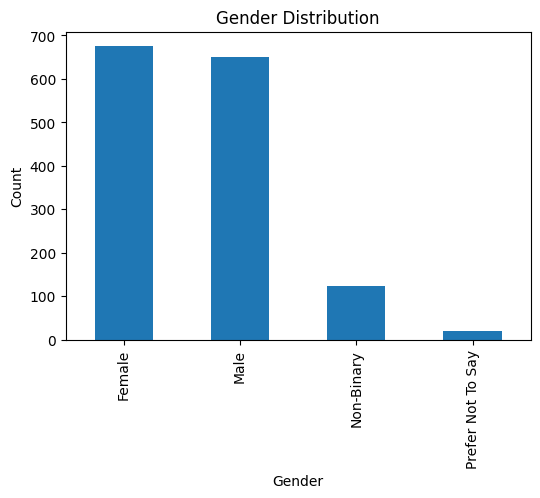

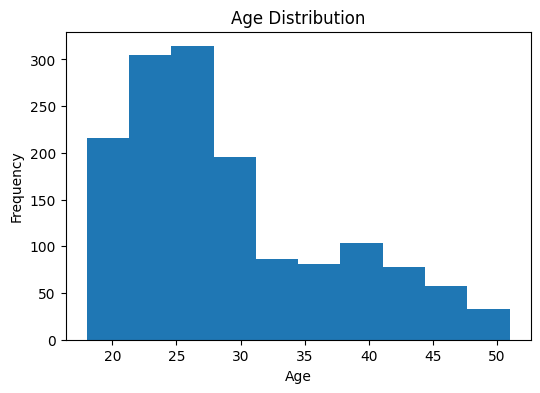


Age Summary:
count    1470.000000
mean       28.989796
std         7.993055
min        18.000000
25%        23.000000
50%        26.000000
75%        34.000000
max        51.000000
Name: Age, dtype: float64

Education Field distribution:
EducationField
Computer Science       440
Information Systems    363
Marketing              325
Economics              101
Business Studies        94
Other                   82
Technical Degree        38
Human Resources         27
Name: count, dtype: int64


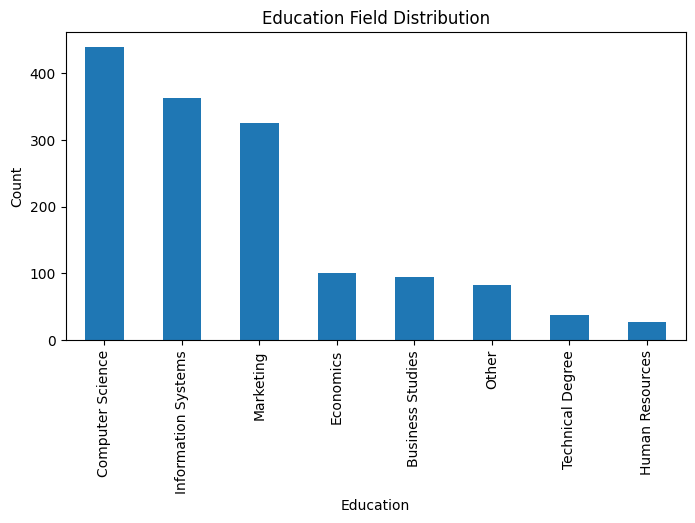


Ethnicity distribution:
Ethnicity
White                               860
Black or African American           207
Mixed or multiple ethnic groups     198
Asian or Asian American             113
American Indian or Alaska Native     50
Native Hawaiian                      26
Other                                16
Name: count, dtype: int64


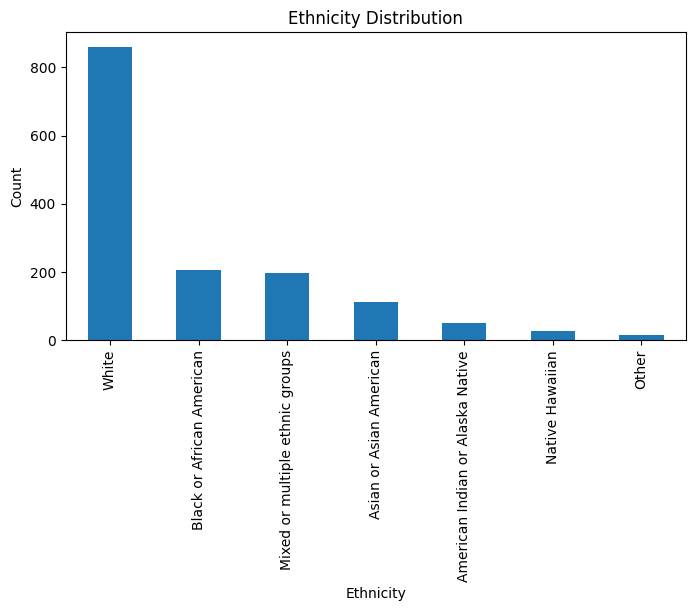

In [117]:
df = pd.read_csv(r"C:\Users\LOQ\Desktop\HR project\Data\HRVisual.csv")
print("Basic dataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe(include='all'))



gender_counts = df['Gender'].value_counts()

print("\nGender distribution:")
print(gender_counts)

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

print("\nAge Summary:")
print(df['Age'].describe())


edu_counts = df['EducationField'].value_counts()

print("\nEducation Field distribution:")
print(edu_counts)

plt.figure(figsize=(8,4))
edu_counts.plot(kind='bar')
plt.title("Education Field Distribution")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()


eth_counts = df['Ethnicity'].value_counts()

print("\nEthnicity distribution:")
print(eth_counts)

plt.figure(figsize=(8,4))
eth_counts.plot(kind='bar')
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.show()

In [125]:
hr = pd.read_csv(r"C:\Users\LOQ\Desktop\HR project\Exports\hr.csv")
hr['DueForPromotion'] = hr.apply(
    lambda row: 1 if (
        row['YearsSinceLastPromotion'] > 5 and 
        row['ManagerTrend'] > 1 and 
        row['ManagerRating'] == 5
    ) else 0,
    axis=1
)

In [126]:

low_perf = hr['ManagerRating'] < 2  
declining_trend = hr['ManagerTrend'] < -1  


hr['AtRiskOfFiring'] = (low_perf & declining_trend)

In [127]:
hr.to_csv(r"C:\Users\LOQ\Desktop\HR project\Exports\HRperfAnalysis.csv", index=False)